# Tahap 0 – Inisialisasi Lingkungan Analisis

Tahap inisialisasi lingkungan dilakukan untuk memastikan bahwa lingkungan komputasi yang digunakan dalam proses analisis Data Science berada dalam kondisi siap dan konsisten. Inisialisasi ini penting untuk menjamin bahwa seluruh proses pengolahan data dapat dijalankan secara reproducible dan bebas dari kendala teknis yang dapat memengaruhi hasil analisis.


In [33]:
import sys
print(sys.version)


3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


Informasi versi Python ditampilkan untuk memastikan bahwa analisis dijalankan pada lingkungan Python 3 yang stabil dan umum digunakan dalam pengembangan Data Science.


In [34]:
import pandas as pd
import numpy as np


Library pandas dan numpy digunakan sebagai library inti dalam analisis ini. Pandas berperan dalam pengelolaan dan manipulasi dataset, sedangkan numpy digunakan untuk mendukung operasi numerik dasar yang diperlukan dalam proses analisis data.


In [35]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)


Pengaturan tampilan dilakukan untuk memastikan seluruh kolom dataset dapat ditampilkan secara utuh tanpa terpotong, sehingga memudahkan proses penelaahan dan validasi struktur data pada tahap selanjutnya.


Pengaturan tampilan dilakukan untuk memastikan seluruh kolom dataset dapat ditampilkan secara utuh tanpa terpotong, sehingga memudahkan proses penelaahan dan validasi struktur data pada tahap selanjutnya.


Dengan selesainya tahap inisialisasi lingkungan, proses analisis dapat dilanjutkan ke tahap pemuatan dataset dan penelaahan struktur data secara menyeluruh.


# Tahap 1 – Pemuatan Dataset dan Penelaahan Awal Data

Tahap pemuatan dataset dan penelaahan awal data dilakukan untuk memastikan bahwa dataset berhasil dimuat ke dalam lingkungan analisis serta untuk memperoleh gambaran awal mengenai struktur dan karakteristik data. Penelaahan awal ini bertujuan untuk memahami bentuk data, jumlah observasi, jenis variabel, dan kelengkapan data sebelum dilakukan proses validasi dan pembersihan data lebih lanjut.


In [36]:
from google.colab import files
uploaded = files.upload()


Saving Campus Recruitment.csv to Campus Recruitment.csv


Dataset dimuat ke dalam lingkungan Google Colab melalui proses unggah file. Tahap ini memastikan bahwa sumber data yang digunakan dalam analisis sesuai dengan dataset yang telah ditetapkan pada studi kasus.


In [37]:
df = pd.read_csv("Campus Recruitment.csv")


Dataset berhasil dibaca menggunakan library pandas dan disimpan dalam sebuah DataFrame untuk memudahkan proses analisis data pada tahap-tahap selanjutnya.


In [38]:
df.shape


(215, 15)

Informasi dimensi dataset ditampilkan untuk mengetahui jumlah observasi (baris) dan jumlah variabel (kolom) yang terdapat dalam dataset. Setiap baris merepresentasikan satu mahasiswa, sedangkan setiap kolom merepresentasikan atribut akademik, latar belakang pendidikan, atau employability.


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                215 non-null    int64  
 1   Jenis Kelamin                     214 non-null    object 
 2   Nilai rata-rata SMP               213 non-null    float64
 3   Lembaga pendidikan kelas 10       215 non-null    object 
 4   Nilai rata-rata SMA               214 non-null    float64
 5   Lembaga pendidikan kelas 12       215 non-null    object 
 6   Jurusan saat SMA                  215 non-null    object 
 7   IPK                               215 non-null    float64
 8   Program studi sarjana             215 non-null    object 
 9   Pengalaman kerja sebelum lulus    215 non-null    object 
 10  Nilai tes kemampuan kerja         209 non-null    float64
 11  Pendidikan pascasarjana           215 non-null    object 
 12  Nilai ra

Informasi struktur dataset ditampilkan untuk mengidentifikasi tipe data pada setiap variabel, jumlah data non-null, serta kebutuhan awal terkait proses validasi dan pembersihan data. Variabel dengan tipe data numerik dan kategorikal dapat diidentifikasi pada tahap ini.


In [40]:
df.describe()


,ID,Nilai rata-rata SMP,Nilai rata-rata SMA,IPK,Nilai tes kemampuan kerja,Nilai rata-rata pascasarjana,Gaji
count,215.000000,213.000000,214.000000,215.000000,209.000000,215.000000,1.480000e+02
mean,108.000000,67.273380,66.330047,66.370186,72.114115,62.278186,5.773108e+06
std,62.209324,10.842297,10.922964,7.358743,13.351612,5.833385,1.869149e+06
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,4.000000e+06
25%,54.500000,60.400000,60.850000,61.000000,60.000000,57.945000,4.800000e+06
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,5.300000e+06
75%,161.500000,75.400000,73.000000,72.000000,84.000000,66.255000,6.000000e+06
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,1.880000e+07


Statistik deskriptif dasar ditampilkan untuk variabel numerik guna memperoleh gambaran umum mengenai distribusi data, nilai rata-rata, nilai minimum, dan nilai maksimum. Informasi ini digunakan sebagai dasar untuk menilai kewajaran nilai data sebelum dilakukan proses validasi lanjutan.


Berdasarkan hasil penelaahan awal, dataset *Campus Recruitment* berhasil dimuat dan memiliki struktur data yang dapat dianalisis lebih lanjut. Tahap ini menjadi dasar untuk proses validasi data yang akan dilakukan pada tahap berikutnya.


# Tahap 2 – Validasi Data

Tahap validasi data dilakukan untuk memastikan bahwa dataset yang digunakan memiliki kualitas yang memadai sebelum dilakukan proses pembersihan dan pemodelan. Validasi data mencakup pemeriksaan kelengkapan data, konsistensi nilai, distribusi kelas pada variabel target, serta identifikasi potensi permasalahan data seperti duplikasi dan data leakage.


In [41]:
df = df.rename(columns={
    "status kelulusan (Bekerja/Belum)": "status",
    "Gaji": "salary"
})


In [42]:
df.columns


Index(['ID', 'Jenis Kelamin', 'Nilai rata-rata SMP', 'Lembaga pendidikan kelas 10', 'Nilai rata-rata SMA', 'Lembaga pendidikan kelas 12', 'Jurusan saat SMA', 'IPK', 'Program studi sarjana', 'Pengalaman kerja sebelum lulus', 'Nilai tes kemampuan kerja', 'Pendidikan pascasarjana', 'Nilai rata-rata pascasarjana', 'status', 'salary'], dtype='object')

In [43]:
df.isnull().sum()


,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


Pemeriksaan nilai kosong (*missing value*) dilakukan untuk mengidentifikasi variabel yang tidak memiliki data lengkap. Informasi ini digunakan untuk menentukan strategi penanganan data pada tahap pembersihan data selanjutnya.


In [44]:
df.isnull().sum().sort_values(ascending=False)


,0
salary,67
Nilai tes kemampuan kerja,6
Nilai rata-rata SMP,2
Jenis Kelamin,1
Nilai rata-rata SMA,1
ID,0
Lembaga pendidikan kelas 10,0
Jurusan saat SMA,0
Lembaga pendidikan kelas 12,0
Program studi sarjana,0


Urutan jumlah *missing value* dari yang terbesar hingga terkecil ditampilkan untuk memudahkan identifikasi variabel yang memerlukan perhatian khusus dalam proses pembersihan data.


In [45]:
df.columns


Index(['ID', 'Jenis Kelamin', 'Nilai rata-rata SMP', 'Lembaga pendidikan kelas 10', 'Nilai rata-rata SMA', 'Lembaga pendidikan kelas 12', 'Jurusan saat SMA', 'IPK', 'Program studi sarjana', 'Pengalaman kerja sebelum lulus', 'Nilai tes kemampuan kerja', 'Pendidikan pascasarjana', 'Nilai rata-rata pascasarjana', 'status', 'salary'], dtype='object')

In [46]:
df["status"].value_counts()


,count
status,
Placed,148
Not Placed,67


Distribusi kelas pada variabel target (*status*) ditampilkan untuk mengetahui proporsi mahasiswa yang berhasil memperoleh pekerjaan (*Placed*) dan yang belum memperoleh pekerjaan (*Not Placed*). Informasi ini penting untuk menilai keseimbangan kelas dalam dataset.


In [47]:
df["status"].value_counts(normalize=True) * 100


,proportion
status,
Placed,68.837209
Not Placed,31.162791


Proporsi kelas dalam bentuk persentase ditampilkan untuk memberikan gambaran yang lebih jelas mengenai tingkat keseimbangan data pada variabel target. Ketidakseimbangan kelas dapat memengaruhi performa model klasifikasi yang akan dibangun.


In [48]:
df.describe()


,ID,Nilai rata-rata SMP,Nilai rata-rata SMA,IPK,Nilai tes kemampuan kerja,Nilai rata-rata pascasarjana,salary
count,215.000000,213.000000,214.000000,215.000000,209.000000,215.000000,1.480000e+02
mean,108.000000,67.273380,66.330047,66.370186,72.114115,62.278186,5.773108e+06
std,62.209324,10.842297,10.922964,7.358743,13.351612,5.833385,1.869149e+06
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,4.000000e+06
25%,54.500000,60.400000,60.850000,61.000000,60.000000,57.945000,4.800000e+06
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,5.300000e+06
75%,161.500000,75.400000,73.000000,72.000000,84.000000,66.255000,6.000000e+06
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,1.880000e+07


Statistik deskriptif kembali digunakan pada tahap validasi untuk memastikan bahwa nilai numerik berada dalam rentang yang wajar dan konsisten dengan konteks akademik. Pemeriksaan ini bertujuan untuk mendeteksi adanya nilai ekstrem atau anomali yang berpotensi memengaruhi hasil analisis.


In [49]:
df.duplicated().sum()


np.int64(0)

Pemeriksaan data duplikat dilakukan untuk memastikan bahwa setiap observasi dalam dataset bersifat unik. Keberadaan data duplikat dapat menyebabkan bias pada proses analisis dan pemodelan.


In [50]:
df.groupby("status")["salary"].count()


,salary
status,
Not Placed,0
Placed,148


Pemeriksaan hubungan antara variabel *salary* dan *status* dilakukan untuk mengidentifikasi potensi *data leakage*. Hasil pemeriksaan menunjukkan bahwa variabel gaji hanya tersedia untuk mahasiswa dengan status *Placed*, sehingga variabel ini bergantung langsung pada variabel target.
Berdasarkan hasil validasi data, ditemukan bahwa variabel *salary* memiliki ketergantungan langsung terhadap variabel target (*status*). Oleh karena itu, variabel tersebut tidak layak digunakan sebagai variabel prediktor dan akan dikeluarkan dari proses pemodelan pada tahap pembersihan data.


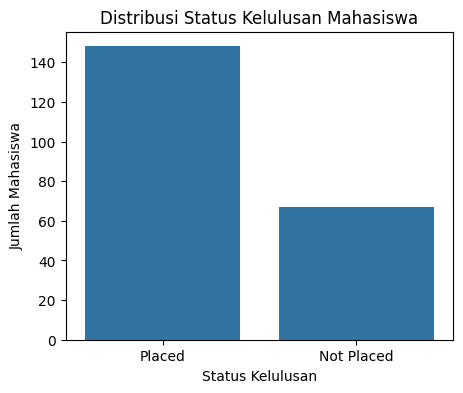

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x=df["status"])
plt.title("Distribusi Status Kelulusan Mahasiswa")
plt.xlabel("Status Kelulusan")
plt.ylabel("Jumlah Mahasiswa")
plt.show()


Visualisasi ini digunakan untuk menampilkan distribusi jumlah mahasiswa yang bekerja dan belum bekerja. Pemeriksaan keseimbangan kelas penting untuk memastikan bahwa model klasifikasi tidak bias terhadap salah satu kelas akibat dominasi jumlah data tertentu.

# Tahap 3 – Menentukan Objek Data

Tahap penentuan objek data dilakukan untuk menetapkan secara eksplisit ruang lingkup analisis berdasarkan struktur dan karakteristik dataset yang telah dimuat dan divalidasi. Penentuan ini dilakukan dengan mempertimbangkan konteks studi kasus, tujuan bisnis, serta tujuan teknis Data Science, sehingga proses analisis selanjutnya dapat berjalan secara terarah dan sistematis.


In [51]:
df.columns


Index(['ID', 'Jenis Kelamin', 'Nilai rata-rata SMP', 'Lembaga pendidikan kelas 10', 'Nilai rata-rata SMA', 'Lembaga pendidikan kelas 12', 'Jurusan saat SMA', 'IPK', 'Program studi sarjana', 'Pengalaman kerja sebelum lulus', 'Nilai tes kemampuan kerja', 'Pendidikan pascasarjana', 'Nilai rata-rata pascasarjana', 'status', 'salary'], dtype='object')

Daftar kolom pada dataset ditampilkan untuk mengidentifikasi seluruh variabel yang tersedia. Informasi ini digunakan untuk mengelompokkan variabel berdasarkan perannya dalam analisis, yaitu sebagai variabel identitas, variabel target, dan variabel kandidat prediktor.


In [52]:
df.head(3)


,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status,salary
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0


Beberapa baris awal dataset ditampilkan kembali untuk memperjelas bahwa setiap baris data merepresentasikan satu individu mahasiswa. Dengan demikian, objek data dalam analisis ini adalah mahasiswa tingkat akhir peserta program campus recruitment.


Variabel *status* ditetapkan sebagai variabel target karena secara langsung merepresentasikan keberhasilan atau kegagalan mahasiswa dalam memperoleh pekerjaan melalui program campus recruitment. Variabel ini bersifat kategorikal dengan dua kelas, yaitu *Placed* dan *Not Placed*, sehingga permasalahan yang dikaji termasuk ke dalam permasalahan klasifikasi dengan pendekatan *supervised learning*.


In [53]:
df["status"].unique()


array(['Placed', 'Not Placed'], dtype=object)

Nilai unik pada variabel target ditampilkan untuk memastikan bahwa kelas yang terdapat pada variabel *status* sesuai dengan definisi permasalahan klasifikasi yang ditetapkan.


Variabel selain *status* diperlakukan sebagai variabel kandidat prediktor yang mencerminkan faktor akademik dan employability mahasiswa. Variabel-variabel tersebut mencakup capaian akademik, latar belakang pendidikan, pengalaman kerja sebelum lulus, serta hasil tes kemampuan kerja. Variabel identitas seperti nomor urut mahasiswa tidak memiliki kontribusi prediktif dan akan dievaluasi lebih lanjut pada tahap pembersihan data.


In [54]:
predictor_candidates = df.drop(columns=["status"]).columns
predictor_candidates


Index(['ID', 'Jenis Kelamin', 'Nilai rata-rata SMP', 'Lembaga pendidikan kelas 10', 'Nilai rata-rata SMA', 'Lembaga pendidikan kelas 12', 'Jurusan saat SMA', 'IPK', 'Program studi sarjana', 'Pengalaman kerja sebelum lulus', 'Nilai tes kemampuan kerja', 'Pendidikan pascasarjana', 'Nilai rata-rata pascasarjana', 'salary'], dtype='object')

Daftar variabel kandidat prediktor ditampilkan untuk memberikan gambaran awal mengenai fitur-fitur yang berpotensi digunakan dalam proses pemodelan. Pada tahap ini, seluruh variabel kandidat masih dipertahankan dan belum dilakukan seleksi atau penghapusan.


Dengan ditetapkannya objek data, variabel target, serta variabel kandidat prediktor berdasarkan struktur dataset, proses analisis dapat dilanjutkan ke tahap pembersihan data. Tahap berikutnya akan berfokus pada penghapusan variabel yang tidak relevan, penanganan nilai kosong, serta persiapan data agar siap digunakan dalam proses konstruksi dan pemodelan.


# Tahap 4 – Pembersihan Data

Tahap pembersihan data dilakukan untuk memperbaiki kualitas dataset dengan menghilangkan variabel yang tidak relevan, menangani nilai kosong, serta memastikan bahwa data yang digunakan bebas dari potensi bias struktural. Pembersihan data merupakan tahapan penting untuk menjamin bahwa dataset yang digunakan pada proses pemodelan memiliki kualitas yang baik dan dapat menghasilkan prediksi yang andal.


In [55]:
df_clean = df.copy()
df_clean.shape


(215, 15)

Salinan dataset dibuat untuk menjaga data asli tetap utuh. Seluruh proses pembersihan data dilakukan pada salinan dataset agar setiap perubahan dapat ditelusuri dan dikontrol dengan baik.


4.1 Penghapusan Variabel Identitas

In [56]:
df_clean.columns


Index(['ID', 'Jenis Kelamin', 'Nilai rata-rata SMP', 'Lembaga pendidikan kelas 10', 'Nilai rata-rata SMA', 'Lembaga pendidikan kelas 12', 'Jurusan saat SMA', 'IPK', 'Program studi sarjana', 'Pengalaman kerja sebelum lulus', 'Nilai tes kemampuan kerja', 'Pendidikan pascasarjana', 'Nilai rata-rata pascasarjana', 'status', 'salary'], dtype='object')

In [59]:
df_clean = df_clean.drop(columns=["ID"])
df_clean.shape


(215, 14)

Variabel identitas berupa nomor urut mahasiswa tidak memiliki kontribusi prediktif terhadap status placement dan berpotensi menimbulkan noise pada proses pemodelan. Oleh karena itu, variabel tersebut dihapus dari dataset.


4.2 Penghapusan Variabel Bermasalah (Data Leakage)

In [60]:
df_clean = df_clean.drop(columns=["salary"])
df_clean.shape


(215, 13)

Variabel gaji hanya tersedia bagi mahasiswa dengan status *Placed* dan bergantung langsung pada variabel target. Keberadaan variabel ini dapat menyebabkan *data leakage* jika digunakan dalam pemodelan, sehingga variabel tersebut dihapus dari dataset.


4.3 Pemeriksaan Nilai Kosong Setelah Penghapusan Kolom

In [61]:
df_clean.isnull().sum()


,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0
Nilai tes kemampuan kerja,6


Pemeriksaan ulang nilai kosong dilakukan setelah penghapusan kolom untuk memastikan bahwa dataset tidak mengandung *missing value* yang dapat mengganggu proses analisis selanjutnya.


4.4 Pemeriksaan Duplikasi Data

In [62]:
df_clean.duplicated().sum()


np.int64(0)

Pemeriksaan duplikasi dilakukan untuk memastikan bahwa setiap observasi dalam dataset bersifat unik. Tidak ditemukannya data duplikat menunjukkan bahwa dataset telah memenuhi syarat kualitas dari sisi keunikan data.


Dengan selesainya tahap pembersihan data, dataset telah terbebas dari variabel yang tidak relevan dan potensi *data leakage*. Dataset hasil pembersihan siap digunakan pada tahap konstruksi data, di mana data akan dipersiapkan secara teknis untuk keperluan pemodelan.


# Tahap 5 – Konstruksi Data

Tahap konstruksi data dilakukan untuk menyiapkan dataset hasil pembersihan agar dapat digunakan pada proses pemodelan. Pada tahap ini dilakukan penetapan variabel target dan variabel prediktor secara teknis, serta transformasi data kategorikal menjadi bentuk numerik yang dapat diproses oleh algoritma pembelajaran mesin.


5.1 Penetapan Variabel Target dan Variabel Prediktor

In [63]:
df_clean.columns


Index(['Jenis Kelamin', 'Nilai rata-rata SMP', 'Lembaga pendidikan kelas 10', 'Nilai rata-rata SMA', 'Lembaga pendidikan kelas 12', 'Jurusan saat SMA', 'IPK', 'Program studi sarjana', 'Pengalaman kerja sebelum lulus', 'Nilai tes kemampuan kerja', 'Pendidikan pascasarjana', 'Nilai rata-rata pascasarjana', 'status'], dtype='object')

In [64]:
X = df_clean.drop(columns=["status"])
y = df_clean["status"]


Variabel *status* ditetapkan sebagai variabel target, sedangkan seluruh variabel lainnya diperlakukan sebagai variabel prediktor. Pemisahan ini diperlukan agar proses pemodelan dapat dilakukan secara terstruktur dan terkontrol.


5.2 Identifikasi Tipe Variabel

In [65]:
X.dtypes


,0
Jenis Kelamin,object
Nilai rata-rata SMP,float64
Lembaga pendidikan kelas 10,object
Nilai rata-rata SMA,float64
Lembaga pendidikan kelas 12,object
Jurusan saat SMA,object
IPK,float64
Program studi sarjana,object
Pengalaman kerja sebelum lulus,object
Nilai tes kemampuan kerja,float64


Pemeriksaan tipe data dilakukan untuk mengidentifikasi variabel numerik dan variabel kategorikal. Informasi ini digunakan untuk menentukan metode transformasi data yang sesuai pada tahap selanjutnya.


5.3 Transformasi Variabel Kategorikal

In [66]:
from sklearn.preprocessing import LabelEncoder


In [67]:
X_encoded = X.copy()
le = LabelEncoder()

for col in X_encoded.select_dtypes(include="object").columns:
    X_encoded[col] = le.fit_transform(X_encoded[col])


Transformasi variabel kategorikal dilakukan menggunakan metode *label encoding*. Setiap kategori diubah menjadi representasi numerik agar dapat diproses oleh algoritma klasifikasi. Pada tahap ini belum dilakukan normalisasi atau standarisasi data.


5.4 Pemeriksaan Hasil Konstruksi Data

In [68]:
X_encoded.head()


,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana
0,2,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80
1,2,79.33,1,78.33,1,2,77.48,2,1,86.5,0,66.28
2,2,65.00,1,68.00,2,0,64.00,0,0,75.0,0,57.80
3,2,56.00,1,52.00,2,2,52.00,2,0,66.0,1,59.43
4,2,85.80,1,73.60,1,1,73.30,0,0,96.8,0,55.50


In [69]:
X_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jenis Kelamin                   215 non-null    int64  
 1   Nilai rata-rata SMP             213 non-null    float64
 2   Lembaga pendidikan kelas 10     215 non-null    int64  
 3   Nilai rata-rata SMA             214 non-null    float64
 4   Lembaga pendidikan kelas 12     215 non-null    int64  
 5   Jurusan saat SMA                215 non-null    int64  
 6   IPK                             215 non-null    float64
 7   Program studi sarjana           215 non-null    int64  
 8   Pengalaman kerja sebelum lulus  215 non-null    int64  
 9   Nilai tes kemampuan kerja       209 non-null    float64
 10  Pendidikan pascasarjana         215 non-null    int64  
 11  Nilai rata-rata pascasarjana    215 non-null    float64
dtypes: float64(5), int64(7)
memory usage

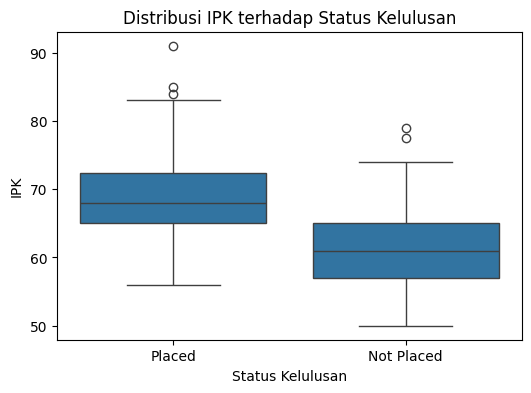

In [93]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x=y,
    y=X_imputed["IPK"]
)
plt.title("Distribusi IPK terhadap Status Kelulusan")
plt.xlabel("Status Kelulusan")
plt.ylabel("IPK")
plt.show()


Hasil konstruksi data diperiksa untuk memastikan bahwa seluruh variabel prediktor telah berada dalam bentuk numerik dan tidak mengandung nilai kosong. Dataset pada tahap ini telah siap digunakan untuk proses pembentukan model.


Dengan selesainya tahap konstruksi data, dataset telah berada dalam format yang sesuai untuk pemodelan. Tahap berikutnya akan berfokus pada penentuan skenario model dan pembagian data latih serta data uji sebelum dilakukan proses pelatihan model.


# Tahap 6 – Membangun Skenario Model

Tahap pembangunan skenario model dilakukan untuk merancang strategi pemodelan sebelum proses pelatihan model dilakukan. Pada tahap ini ditetapkan skema pembagian data latih dan data uji, serta pendekatan model klasifikasi yang akan digunakan untuk memprediksi status placement mahasiswa.


6.1 Pembagian Data Latih dan Data Uji

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Dataset dibagi menjadi data latih dan data uji dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Parameter *stratify* digunakan untuk menjaga proporsi kelas pada variabel target agar tetap seimbang pada data latih dan data uji. Penggunaan *random_state* bertujuan untuk memastikan bahwa proses pembagian data bersifat reproducible.


6.2 Verifikasi Hasil Pembagian Data

In [72]:
X_train.shape, X_test.shape


((172, 12), (43, 12))

In [73]:
y_train.value_counts(normalize=True) * 100


,proportion
status,
Placed,68.604651
Not Placed,31.395349


In [74]:
y_test.value_counts(normalize=True) * 100


,proportion
status,
Placed,69.767442
Not Placed,30.232558


Distribusi kelas pada data latih dan data uji diperiksa untuk memastikan bahwa pembagian data tidak menyebabkan ketidakseimbangan kelas yang signifikan. Konsistensi distribusi kelas penting untuk menjaga validitas evaluasi model pada tahap pengujian.


6.3 Penetapan Pendekatan Model Klasifikasi
Berdasarkan karakteristik permasalahan dan variabel target yang bersifat kategorikal dengan dua kelas, pendekatan yang digunakan adalah model klasifikasi dengan *supervised learning*. Pada tahap ini direncanakan penggunaan beberapa algoritma klasifikasi untuk dibandingkan performanya, antara lain:

1. Logistic Regression, sebagai model baseline yang bersifat linear dan mudah diinterpretasikan.
2. Decision Tree Classifier, sebagai model non-linear yang mampu menangkap hubungan kompleks antarvariabel.

Penetapan lebih dari satu model bertujuan untuk memperoleh model dengan performa terbaik serta memberikan dasar perbandi

# Tahap 7 – Membangun Model

Tahap membangun model dilakukan untuk melatih algoritma klasifikasi menggunakan data latih yang telah disiapkan pada tahap sebelumnya. Model yang dibangun bertujuan untuk memprediksi status kelulusan mahasiswa berdasarkan faktor akademik dan employability yang terdapat dalam dataset.


7.1 Pembangunan Model Klasifikasi Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression


Cell A – Identifikasi kolom yang masih NaN

In [77]:
X_encoded.isnull().sum().sort_values(ascending=False)


,0
Nilai tes kemampuan kerja,6
Nilai rata-rata SMP,2
Nilai rata-rata SMA,1
Jenis Kelamin,0
Lembaga pendidikan kelas 10,0
Lembaga pendidikan kelas 12,0
IPK,0
Jurusan saat SMA,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


Cell B – Imputasi Missing Value (Numerik)

In [78]:
from sklearn.impute import SimpleImputer


In [79]:
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(
    imputer.fit_transform(X_encoded),
    columns=X_encoded.columns
)


Cell C – Split ulang data

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Cell D – Verifikasi Ulang

In [81]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()


(np.int64(0), np.int64(0))

In [83]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Model Logistic Regression digunakan sebagai model baseline karena bersifat sederhana, mudah diinterpretasikan, dan umum digunakan pada permasalahan klasifikasi biner. Parameter *max_iter* ditingkatkan untuk memastikan proses konvergensi model berjalan dengan baik.


7.2 Prediksi Menggunakan Data Uji

In [84]:
y_pred_lr = log_reg.predict(X_test)


Prediksi dilakukan menggunakan data uji untuk mengevaluasi kemampuan generalisasi model terhadap data yang tidak digunakan pada proses pelatihan.


7.3 Evaluasi Performa Model Logistic Regression

In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [86]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr


0.8837209302325582

In [87]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

  Not Placed       0.83      0.77      0.80        13
      Placed       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43



Evaluasi performa model dilakukan menggunakan metrik akurasi, precision, recall, dan F1-score. Metrik-metrik ini digunakan untuk menilai kemampuan model dalam mengklasifikasikan mahasiswa yang bekerja dan belum bekerja secara seimbang.


7.4 Confusion Matrix

In [88]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_lr


array([[10,  3],
       [ 2, 28]])

Confusion matrix digunakan untuk melihat secara rinci jumlah prediksi yang benar dan salah pada masing-masing kelas. Informasi ini membantu dalam memahami pola kesalahan model klasifikasi.


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


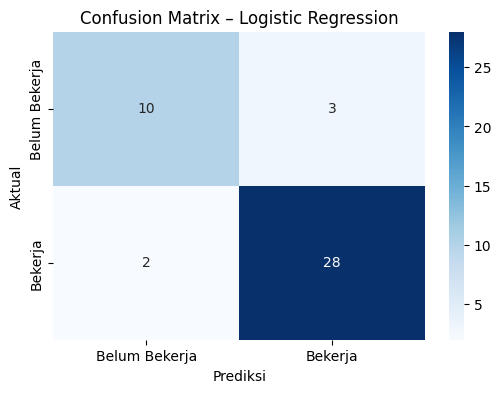

In [91]:
plt.figure(figsize=(6,4))
sns.heatmap(
    conf_matrix_lr,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Belum Bekerja", "Bekerja"],
    yticklabels=["Belum Bekerja", "Bekerja"]
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


7.5 Interpretasi Awal Model

In [89]:
coeff_df = pd.DataFrame({
    "Variabel": X_train.columns,
    "Koefisien": log_reg.coef_[0]
}).sort_values(by="Koefisien", ascending=False)

coeff_df


,Variabel,Koefisien
8,Pengalaman kerja sebelum lulus,1.659132
0,Jenis Kelamin,0.662636
2,Lembaga pendidikan kelas 10,0.252337
1,Nilai rata-rata SMP,0.225142
6,IPK,0.198616
3,Nilai rata-rata SMA,0.055773
9,Nilai tes kemampuan kerja,-0.019303
10,Pendidikan pascasarjana,-0.191986
11,Nilai rata-rata pascasarjana,-0.213180
7,Program studi sarjana,-0.556561


Koefisien model Logistic Regression dianalisis untuk mengetahui arah dan kekuatan pengaruh masing-masing variabel terhadap status kelulusan mahasiswa. Variabel dengan nilai koefisien yang lebih besar menunjukkan kontribusi yang lebih signifikan dalam proses prediksi.


Visualisasi Pengaruh Variabel (Feature Importance – Logistic Regression)

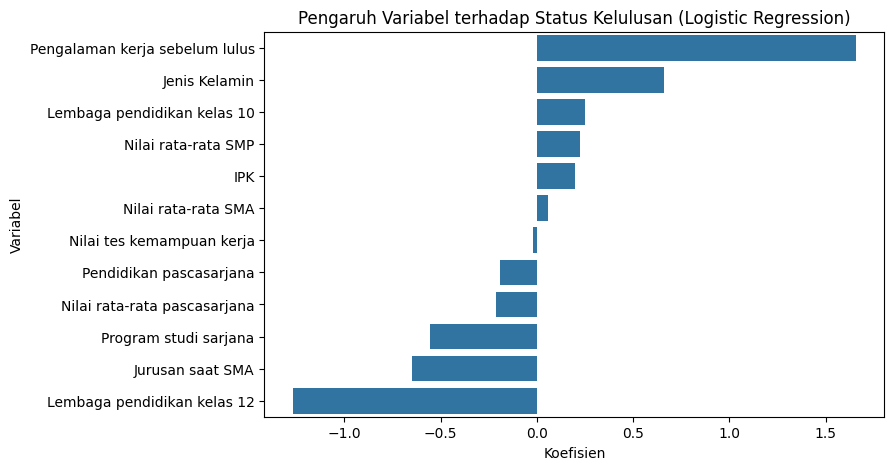

In [94]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=coeff_df["Koefisien"],
    y=coeff_df["Variabel"]
)
plt.title("Pengaruh Variabel terhadap Status Kelulusan (Logistic Regression)")
plt.xlabel("Koefisien")
plt.ylabel("Variabel")
plt.show()


# Tahap 8 – Evaluasi Hasil Pemodelan

Tahap evaluasi hasil pemodelan dilakukan untuk menilai kinerja model klasifikasi yang telah dibangun dalam memprediksi status kelulusan mahasiswa. Evaluasi ini bertujuan untuk mengetahui sejauh mana model mampu melakukan prediksi secara akurat dan seimbang pada data yang belum pernah dilihat sebelumnya.


8.1 Evaluasi Akurasi Model

In [95]:
accuracy_lr


0.8837209302325582

Nilai akurasi digunakan untuk mengukur proporsi prediksi yang benar terhadap seluruh data uji. Metrik ini memberikan gambaran umum mengenai kemampuan model dalam melakukan klasifikasi, namun tidak digunakan sebagai satu-satunya indikator performa model.


8.2 Evaluasi Precision, Recall, dan F1-Score

In [97]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

  Not Placed       0.83      0.77      0.80        13
      Placed       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43



Evaluasi lanjutan dilakukan menggunakan metrik precision, recall, dan F1-score untuk masing-masing kelas. Precision menunjukkan tingkat ketepatan prediksi pada suatu kelas, recall menunjukkan kemampuan model dalam mengenali seluruh data pada kelas tersebut, sedangkan F1-score merupakan harmonisasi antara precision dan recall. Penggunaan metrik ini penting untuk menilai performa model secara lebih komprehensif, terutama pada permasalahan klasifikasi biner.


8.3 Evaluasi Kesalahan Prediksi Menggunakan Confusion Matrix

In [98]:
conf_matrix_lr


array([[10,  3],
       [ 2, 28]])

Confusion matrix digunakan untuk menganalisis kesalahan prediksi yang dilakukan oleh model. Matriks ini menunjukkan jumlah prediksi benar dan salah pada masing-masing kelas, sehingga dapat diketahui pola kesalahan model dalam mengklasifikasikan mahasiswa yang bekerja dan belum bekerja.


8.3 Visualisasi Confusion Matrix (Evaluasi Kesalahan Prediksi)

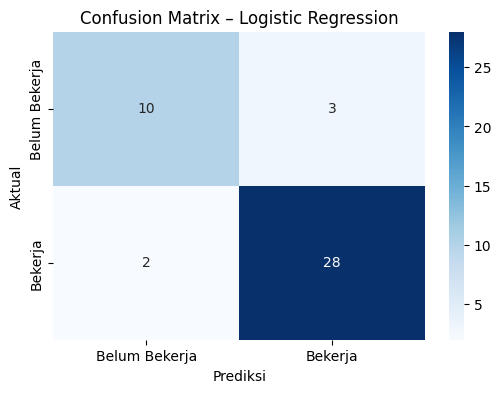

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(
    conf_matrix_lr,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Belum Bekerja", "Bekerja"],
    yticklabels=["Belum Bekerja", "Bekerja"]
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


8.4 ROC Curve (Receiver Operating Characteristic)

In [101]:
y = y.map({
    "Not Placed": 0,
    "Placed": 1
})


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [103]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]


In [104]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
auc_score = roc_auc_score(y_test, y_prob_lr)

auc_score


np.float64(0.9538461538461538)

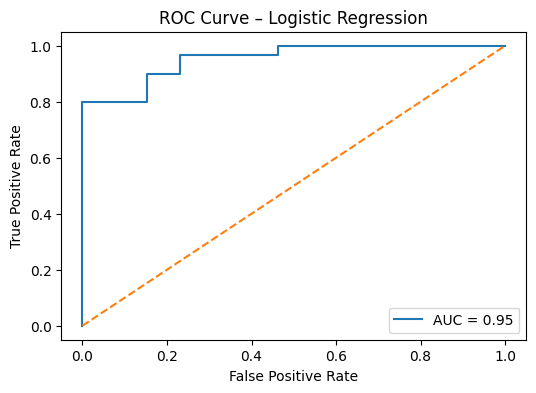

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()


8.5 Precision–Recall Curve

In [106]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr)
avg_precision = average_precision_score(y_test, y_prob_lr)


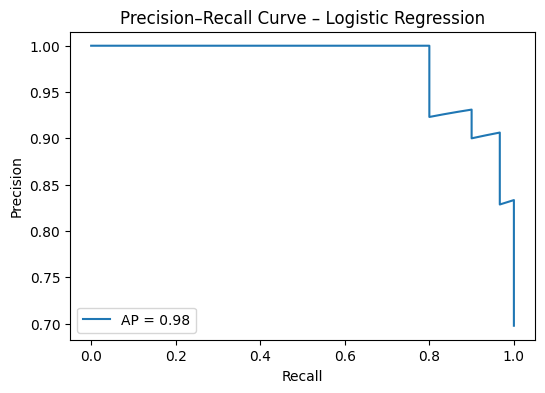

In [107]:
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"AP = {avg_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Logistic Regression")
plt.legend()
plt.show()


8.6 Analisis Hasil Evaluasi Model

Hasil evaluasi menunjukkan bahwa model Logistic Regression memiliki kinerja yang baik dalam memprediksi status kelulusan mahasiswa. Nilai akurasi sebesar 88,37% menunjukkan bahwa sebagian besar data uji dapat diklasifikasikan dengan benar. Model menunjukkan performa yang lebih kuat pada kelas Placed, dengan nilai precision 0,90 dan recall 0,93, yang menandakan kemampuan model yang baik dalam mengenali mahasiswa yang berhasil memperoleh pekerjaan.

Namun, pada kelas Not Placed, nilai recall sebesar 0,77 menunjukkan bahwa masih terdapat sebagian mahasiswa yang belum bekerja tetapi diprediksi sebagai bekerja. Hal ini tercermin pada confusion matrix yang menunjukkan beberapa kesalahan klasifikasi pada kelas tersebut. Nilai AUC sebesar 0,95 mengindikasikan bahwa model memiliki kemampuan diskriminasi yang sangat baik dalam membedakan kedua kelas pada berbagai ambang keputusan.

8.7 Kesimpulan Tahap Evaluasi

Tahap evaluasi menunjukkan bahwa model Logistic Regression mampu memberikan prediksi status kelulusan mahasiswa dengan tingkat akurasi dan kemampuan diskriminasi yang tinggi. Meskipun demikian, masih terdapat keterbatasan dalam mengenali mahasiswa yang belum bekerja, sehingga diperlukan pengembangan lebih lanjut, baik melalui eksplorasi model lain maupun penyesuaian strategi pemodelan.

# Tahap 9 – Review & Interpretasi Pemodelan


9.1 Visualisasi Faktor Paling Berpengaruh (Review Model)

<Axes: xlabel='Koefisien', ylabel='Variabel'>

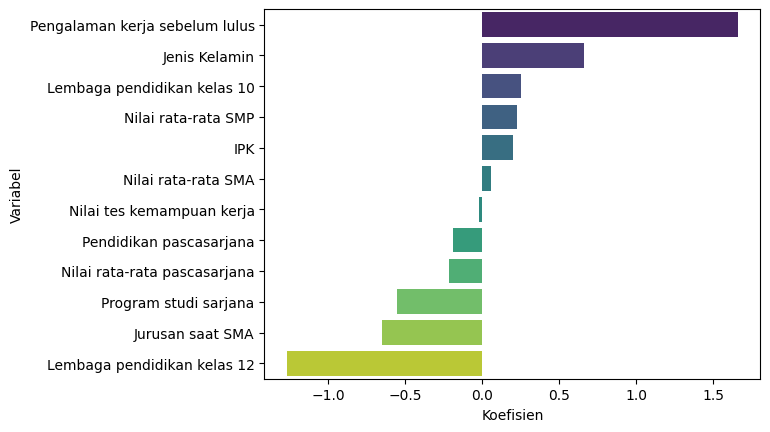

In [111]:
sns.barplot(
    x=coeff_df["Koefisien"],
    y=coeff_df["Variabel"],
    hue=coeff_df["Variabel"],
    dodge=False,
    palette="viridis",
    legend=False
)


9.2 Review Kinerja Model Secara Ringkas (Ringkasan Evaluasi)

In [109]:
summary_eval = pd.DataFrame({
    "Metrik": ["Akurasi", "AUC"],
    "Nilai": [accuracy_lr, auc_score]
})
summary_eval


,Metrik,Nilai
0,Akurasi,0.883721
1,AUC,0.953846


9.3 Review Kelebihan dan Keterbatasan Model

Berdasarkan visualisasi kontribusi variabel dan ringkasan metrik evaluasi, model Logistic Regression memiliki kelebihan utama pada aspek interpretabilitas. Koefisien model menunjukkan secara jelas variabel-variabel yang paling berpengaruh terhadap status kelulusan mahasiswa, sehingga hasil pemodelan mudah dipahami dan relevan untuk analisis akademik. Nilai akurasi sebesar 88,37% dan AUC sebesar 0,95 menunjukkan bahwa model memiliki kinerja yang baik dan kemampuan diskriminasi yang sangat kuat.

Namun demikian, model masih memiliki keterbatasan dalam mengenali mahasiswa dengan status Belum Bekerja. Hal ini terlihat dari nilai recall yang lebih rendah pada kelas tersebut serta adanya kesalahan klasifikasi pada confusion matrix. Keterbatasan ini mengindikasikan bahwa hubungan antara variabel prediktor dan status kelulusan belum sepenuhnya tertangkap secara optimal oleh model linear.

9.4 Implikasi Akademik dan Strategis

Hasil interpretasi pemodelan menunjukkan bahwa faktor pengalaman kerja sebelum lulus dan indikator akademik memiliki pengaruh signifikan terhadap keberhasilan penempatan kerja mahasiswa. Temuan ini mengindikasikan bahwa perguruan tinggi dapat meningkatkan tingkat employability lulusan melalui penguatan program magang, kerja praktik, serta peningkatan kualitas capaian akademik dan kesiapan kerja mahasiswa.

Model yang dibangun dapat dimanfaatkan sebagai alat bantu prediksi awal untuk mengidentifikasi mahasiswa yang memerlukan intervensi tambahan sebelum lulus. Meskipun demikian, untuk mendukung pengambilan keputusan strategis yang lebih akurat, disarankan pengembangan lanjutan dengan menggunakan algoritma non-linear atau penambahan variabel yang lebih representatif.